In [1]:
import sys
sys.path.append('../../')
import numpy as np

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import History
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.path_planner.sampling_base import ChanceConstrainedRRTstar, ChanceConstrainedRRT

In [2]:
world = World(end_step=200)
world.read_objects("../../rover_simulator/examples/environment_simple.txt")

rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

path_planner = ChanceConstrainedRRTstar(
    start_pose[0:2],
    goal_pos,
    start_cov=np.diag([1e-10, 1e-10, 1e-10]),
    motion_noise_stds = {"nn": 0.05, "no": 0.00005, "on": 0.005, "oo": 0.01},
    enlarge_range=rover_r,
    explore_region=[[0, 20], [0, 20]],
    known_obstacles=world.obstacles,
    path_resolution=2.0,
    p_safe=1.0-1e-5
)

rover = BasicRover(
    start_pose, rover_r,
    sensor=None,
    mapper=None,
    path_planner=path_planner,
    localizer=None,
    controller=ConstantSpeedController(w=np.pi/32),
    history=History()
)

world.append_rover(rover)

In [3]:
import line_profiler
# from rover_simulator.utils.motion import state_transition, covariance_transition

In [4]:
def process():
    rover.waypoints = rover.path_planner.calculate_path(max_iter=200)

prof = line_profiler.LineProfiler()
# prof.add_function(rover.path_planner.calculate_path)
prof.add_function(ChanceConstrainedRRT.calculate_path)
prof.add_function(rover.path_planner.expand_tree)
prof.add_function(rover.path_planner.connect_to_target)
prof.add_function(rover.path_planner.is_safe)
prof.add_function(rover.path_planner.steer)
# prof.add_function(state_transition)
# prof.add_function(covariance_transition)
# prof.add_function(rover.path_planner.generate_final_course)
prof.runcall(process)
prof.print_stats()

Timer unit: 1e-07 s

Total time: 1.55999 s
File: C:\Users\k1100\Documents\Project\1_Rover_Simulator\rover_simulator\navigation\path_planner\sampling_base.py
Function: calculate_path at line 502

Line #      Hits         Time  Per Hit   % Time  Line Contents
   502                                               def calculate_path(self, max_iter: int = 200, *kargs) -> list:
   503         1         38.0     38.0      0.0          self.cnt = 0
   504         1         19.0     19.0      0.0          if self.start_node is None:
   505                                                       raise ValueError("start_node is None")
   506         1         15.0     15.0      0.0          if self.goal_node is None:
   507                                                       raise ValueError("goal_node is None")
   508                                           
   509         1         23.0     23.0      0.0          self.node_list = [self.start_node]
   510         1         18.0     18.0      0.

In [8]:
rover.waypoints = rover.path_planner.calculate_path(max_iter=100)

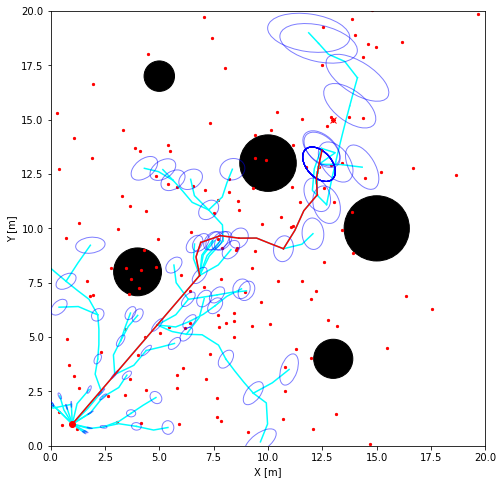

In [9]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r
)

In [7]:
# path_planner.draw(
#     xlim=[0.0, 20.0],
#     ylim=[0.0, 20.0],
#     obstacles=world.obstacles, enlarge_range=rover.r,
#     draw_result_only=True
# )

In [8]:
# world.plot(xlim=[0, 20], ylim=[0, 20], enlarge_range=rover.r, draw_waypoints=True)

In [9]:
# for n in path_planner.node_list:
#     print(n.x, n.y)